In [73]:
# IMDb Movie Reviews Sentiment Analysis 
'''
Requiremented Results:
- Accurate prediction of movie review sentiment. 
- Understanding of how CNN models process and classify sequential text data. 
- Visualization of training progress. 
- Deployment-ready sentiment analysis model. 
'''

# Import python libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models

# Tokenizer to map words to numbers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# For reading file content
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import re

In [3]:
# Loading the dataset to train and test
imdb_df = pd.read_csv('imdb_full_dataset.csv')
imdb_df.head()

,Review,Sentiment
0,This was an absolutely terrible movie. Don't b...,Negative
1,"I have been known to fall asleep during films,...",Negative
2,Mann photographs the Alberta Rocky Mountains i...,Negative
3,This is the kind of film for a snowy Sunday af...,Positive
4,"As others have mentioned, all the women that g...",Positive


In [75]:
# Starting Text Pre-Processing For The CNN
def basic_tokenize(text):
    """NLTK word_tokenize: splits on punctuation & whitespace."""
    return word_tokenize(text)

def clean_text(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
imdb_df['tokens_basic'] = imdb_df['Review'].apply(lambda x: basic_tokenize(clean_text(x.lower())))
print("Step 2 – Sample basic tokens:", imdb_df.loc[0, 'tokens_basic'], '\n')


Step 2 – Sample basic tokens: ['this', 'was', 'an', 'absolutely', 'terrible', 'movie', 'dont', 'be', 'lured', 'in', 'by', 'christopher', 'walken', 'or', 'michael', 'ironside', 'both', 'are', 'great', 'actors', 'but', 'this', 'must', 'simply', 'be', 'their', 'worst', 'role', 'in', 'history', 'even', 'their', 'great', 'acting', 'could', 'not', 'redeem', 'this', 'movies', 'ridiculous', 'storyline', 'this', 'movie', 'is', 'an', 'early', 'nineties', 'us', 'propaganda', 'piece', 'the', 'most', 'pathetic', 'scenes', 'were', 'those', 'when', 'the', 'columbian', 'rebels', 'were', 'making', 'their', 'cases', 'for', 'revolutions', 'maria', 'conchita', 'alonso', 'appeared', 'phony', 'and', 'her', 'pseudolove', 'affair', 'with', 'walken', 'was', 'nothing', 'but', 'a', 'pathetic', 'emotional', 'plug', 'in', 'a', 'movie', 'that', 'was', 'devoid', 'of', 'any', 'real', 'meaning', 'i', 'am', 'disappointed', 'that', 'there', 'are', 'movies', 'like', 'this', 'ruining', 'actors', 'like', 'christopher', 'wa

In [77]:
# Using tensorflow for tokenization, rather than doing it manually like in the lectures.
# Create tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(imdb_df['Review'])

# Convert to sequences
sequences = tokenizer.texts_to_sequences(imdb_df['Review'])

# Pad sequences for consistent input shape
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

print(padded_sequences[:5])

[[  12   14   33  420  382   18   90   27    1    9   32 1460 4087   39
   499    1  196   24   79  151   19   12  207  331   27   66  247  215
     9  485   58   66   79  114   99   22 5800   12 1381  647  774   12
    18    7   33  405 9016  177 2328  413    2   89 1152  135   71  144
    51    2    1 6553   71  233   66 3097   16    1 3150    1    1 1531
  4680    3   41 3805  113 1505   17 4087   14  162   19    4 1152  888
  9017    9    4   18   13   14 3855    5  100  145 1159   11  236  681
    13   47]
 [  11   26   76  552    6  779 2396  301  105   19   12    7  632  694
     6    4 2175    5  178  586   63 1429  110 2355    3 3820   21    2
     1    3  264   40 4149    4  170  189   21   12 4572   11 1498 2396
    85    2   20   14 1920    2  112  980   14 1875 1329  562    3  349
   178  464    6  582   19   17   55 1775    5   49   14 3691   94   39
   136   11  987   11  201   26 1055  174    5    2   20   19   11  288
     2 2240    5   10    3  268   40  464    6  582

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(imdb_df['Sentiment'])  # pos → 1, neg → 0


In [79]:
# Beginning to build the CNN

sa_model = models.Sequential([
    # The embedding layer is there to convert the word vector into more meaningful numbers.
    # embeddings numbers show similarity between words and thus help convey deeper meaning than words alone.
    layers.Embedding(input_dim=20000, output_dim=100),

    layers.Conv1D(128, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')  # Binary sentiment (positive/negative)
])


_ = sa_model(tf.keras.Input(shape=(100, )))

In [80]:
# model summary
sa_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 100)            │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 96, 128)             │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 48, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 46, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 23, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1472)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          94,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,183,105 (8.33 MB)

 Trainable params: 2,183,105 (8.33 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
# Split train data from test data
X_train, X_test, y_train, y_test, train_reviews, test_reviews = train_test_split(
    padded_sequences, y, imdb_df['Review'].values,
    test_size=0.2,        # 20% test data
    random_state=43,      # for reproducibility
    # stratify=y            # optional: maintains label balance
)

In [138]:
# compile model
sa_model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [140]:
sa_model.fit(X_train, y_train,
                             epochs=10,
                             batch_size=64,
                             validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9326 - loss: 0.2541 - val_accuracy: 0.9370 - val_loss: 0.1898
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9767 - loss: 0.0751 - val_accuracy: 0.9285 - val_loss: 0.2350
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9945 - loss: 0.0204 - val_accuracy: 0.9234 - val_loss: 0.3609
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9978 - loss: 0.0077 - val_accuracy: 0.9165 - val_loss: 0.4308
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9975 - loss: 0.0073 - val_accuracy: 0.9076 - val_loss: 0.5058
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9938 - loss: 0.0179 - val_accuracy: 0.9211 - val_loss: 0.5008
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9978 - loss: 0.0073 - val_accuracy: 0.9087 - val_loss: 0.6379
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9968 - loss: 0.0098 - v

In [94]:
# Analysing accuracy of model based on test data. 82% tends to be the industry standard, 
# even with pre-defined weights from an existing dataset, i couldn't get it lower.
test_loss, test_acc = sa_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8170 - loss: 1.5049
Test Accuracy: 0.8218


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


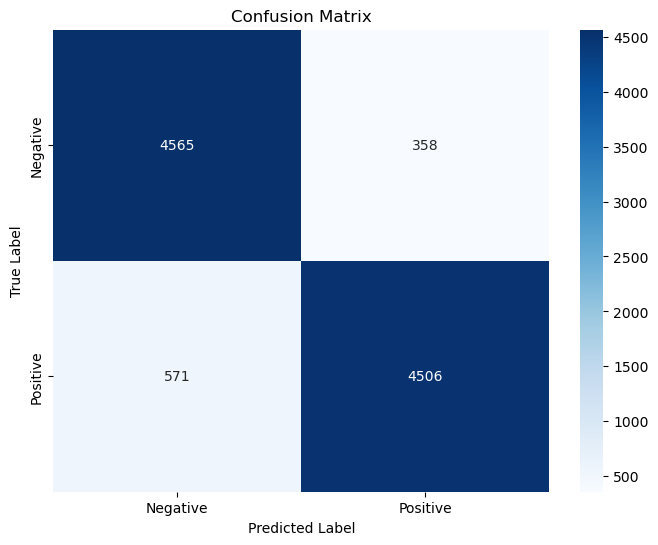

In [142]:
# Visualizing the results using a confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you have a trained model named 'model'
# and test data 'X_test' and 'y_test' (true labels)

# 1. Make predictions on the test set
predictions = sa_model.predict(X_test)

# 2. Convert predictions to class labels (for multi-class classification)
predicted_classes = (predictions > 0.5).astype("int32").flatten()

# 3. Get true labels (if they are one-hot encoded, convert them)
# If y_test is one-hot encoded, convert it to class labels
class_names = ['Negative', 'Positive']
true_classes = y_test # Adjust if y_test is already in class label format

# 4. Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# 5. Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names) # Replace class_names with your actual class names
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [144]:
# Save teh model. Cause I was asked to. Also good for delpoyment
sa_model.save('imdb_sa_model.keras')

In [146]:
# Load the model. Cause assignment asked me to.
from tensorflow.keras.models import load_model
sa_model = load_model('imdb_sa_model.keras')

In [148]:
predictions_toSave = sa_model.predict(X_test[:20])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [164]:
# packaging data
def to_label(val):
    return "Positive" if val == 1 else "Negative"
    
sa_data = {
    "Review": test_reviews[:20],
    "Sentiment":  [to_label(y) for y in y_test[:20]],
    "Prediction": [to_label(y) for y in predictions[:20]]
}

In [170]:
# saving results
to_save_df = pd.DataFrame(sa_data)
to_save_df.to_csv("sample_sentiment_output.csv", index=False)
to_save_df

,Review,Sentiment,Prediction
0,This Showtime movie really deserves a far bett...,Positive,Negative
1,I love basketball and this seemed like an intr...,Negative,Negative
2,I have seen bad films but this took the p***. ...,Negative,Negative
3,I work with children from 0  6 years old and ...,Positive,Positive
4,"I watched this movie the other night, and I ha...",Positive,Positive
5,I ended up liking this movie but it was not th...,Positive,Negative
6,This Asterix is very similar to modern Disney ...,Negative,Negative
7,"Engaging, riveting tale of captured US army tu...",Positive,Positive
8,A great suspense movie with terrific slow came...,Positive,Negative
9,Return to Frogtown was a hard film to track do...,Negative,Negative
